# Data Preprocessing

### Import libraries

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data Sets

In [24]:
dataset = pd.read_csv('E:\Mahendra Data Analysis\Python Learning MAAHI\Machine Learning\Algorithm\Data Processing\Data.csv')
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [6]:
len(dataset)

10

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [33]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


### Dealing With Missing Value

#### Checking NULL Value

In [7]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

#### Visualize NULL Value

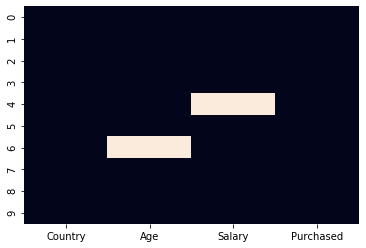

In [13]:
sns.heatmap(dataset.isnull(),cbar=False)

#### Replacing/ Discarding NULL Value

In [21]:
# replace missing values with the column mean
dataset_mean=dataset.fillna(dataset.mean()) # Replace Missing value with Mean
dataset_mean
dataset_median=dataset.fillna(dataset.median()) # Replace Missing value with Median
dataset_median
dataset_zero=dataset.fillna(0) # Replace Missing value with Zero
dataset_zero

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,0.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [60]:
data = dataset.apply(lambda x: x.fillna(x.median()) if x.dtype=="float64" else x.fillna(x.mode()[0]), axis=0)

In [61]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#### Encoding Data

In [62]:
data1=pd.get_dummies(data, columns=["Country"])
#X.head()

In [66]:
data1=pd.get_dummies(data1, columns=["Purchased"])

In [68]:
data1=data1.drop("Purchased_No", axis=1)

In [70]:
data1

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_Yes
0,44.0,72000.0,1,0,0,0
1,27.0,48000.0,0,0,1,1
2,30.0,54000.0,0,1,0,0
3,38.0,61000.0,0,0,1,0
4,40.0,61000.0,0,1,0,1
5,35.0,58000.0,1,0,0,1
6,38.0,52000.0,0,0,1,0
7,48.0,79000.0,1,0,0,1
8,50.0,83000.0,0,1,0,0
9,37.0,67000.0,1,0,0,1


#### Feature Scaling

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(data1)
norm

MinMaxScaler(copy=True, feature_range=(0, 1))

In [79]:
data1

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_Yes
0,44.0,72000.0,1,0,0,0
1,27.0,48000.0,0,0,1,1
2,30.0,54000.0,0,1,0,0
3,38.0,61000.0,0,0,1,0
4,40.0,61000.0,0,1,0,1
5,35.0,58000.0,1,0,0,1
6,38.0,52000.0,0,0,1,0
7,48.0,79000.0,1,0,0,1
8,50.0,83000.0,0,1,0,0
9,37.0,67000.0,1,0,0,1
